In [1]:
import pickle
from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation,Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from sklearn.model_selection import train_test_split

In [2]:
def loadPickleData(file):
    data = pickle.load(open(file, 'rb'));
    images = data[0];
    labels = data[1];
    return [images, labels]

In [3]:
[images,labels] = loadPickleData("./../Data/pickledFiles/Num_NewData_1char_1channel.p")

In [4]:
y = np_utils.to_categorical(labels);
print(y);
print(y.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
(5000, 10)


In [5]:
X = images

In [6]:
X.shape

(5000, 60, 40)

In [7]:
X = np.reshape(X, (5000,60,40,1))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2);

In [9]:
model = Sequential();


In [10]:
model.add(Conv2D(20,(2,2),strides = 1, activation = 'relu', input_shape = (60,40,1)))
model.add(MaxPooling2D(pool_size = (2,2)));

In [11]:
model.add(Conv2D(40,(3,3),strides = 1, activation = 'relu'))
model.add(Dropout(0.1));
model.add(Conv2D(80,(2,2),strides = 1, activation = 'relu'))

In [12]:
model.add(Conv2D(40,(2,2),strides = 1, activation = 'relu'))

In [13]:
model.add(MaxPooling2D(pool_size = (2,2)));

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(500, activation = 'relu'))
model.add(Dropout(0.1));
model.add(Dense(200, activation = 'relu'))
model.add(Dropout(0.1));

In [16]:
num_classes = y.shape[1]
model.add(Dense(num_classes, activation = 'softmax'));

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
lossCheck = ModelCheckpoint('singleCharLossNewDataCNN.h5', monitor='val_loss', verbose=True, save_best_only=True)
accCheck = ModelCheckpoint('singleCharAccNewDataCNN.h5', monitor='val_accuracy', verbose=True, save_best_only=True)

In [19]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=1000, epochs=100, verbose=1, callbacks=[lossCheck, accCheck])


Epoch 1/100
4/4 [==============================] - 2s 522ms/step - loss: 42.7736 - accuracy: 0.1032 - val_loss: 7.0245 - val_accuracy: 0.1180

Epoch 00001: val_loss improved from inf to 7.02449, saving model to singleCharLossNewDataCNN.h5

Epoch 00001: val_accuracy improved from -inf to 0.11800, saving model to singleCharAccNewDataCNN.h5
Epoch 2/100
4/4 [==============================] - 2s 471ms/step - loss: 6.4581 - accuracy: 0.1015 - val_loss: 2.5512 - val_accuracy: 0.1050

Epoch 00002: val_loss improved from 7.02449 to 2.55122, saving model to singleCharLossNewDataCNN.h5

Epoch 00002: val_accuracy did not improve from 0.11800
Epoch 3/100
4/4 [==============================] - 2s 487ms/step - loss: 2.6147 - accuracy: 0.1070 - val_loss: 2.3325 - val_accuracy: 0.1120

Epoch 00003: val_loss improved from 2.55122 to 2.33253, saving model to singleCharLossNewDataCNN.h5

Epoch 00003: val_accuracy did not improve from 0.11800
Epoch 4/100
4/4 [==============================] - 2s 478ms/step


Epoch 00025: val_loss improved from 0.45611 to 0.39025, saving model to singleCharLossNewDataCNN.h5

Epoch 00025: val_accuracy improved from 0.83600 to 0.85200, saving model to singleCharAccNewDataCNN.h5
Epoch 26/100
4/4 [==============================] - 2s 484ms/step - loss: 0.4406 - accuracy: 0.8447 - val_loss: 0.3630 - val_accuracy: 0.8620

Epoch 00026: val_loss improved from 0.39025 to 0.36300, saving model to singleCharLossNewDataCNN.h5

Epoch 00026: val_accuracy improved from 0.85200 to 0.86200, saving model to singleCharAccNewDataCNN.h5
Epoch 27/100
4/4 [==============================] - 2s 476ms/step - loss: 0.4123 - accuracy: 0.8480 - val_loss: 0.3406 - val_accuracy: 0.8780

Epoch 00027: val_loss improved from 0.36300 to 0.34062, saving model to singleCharLossNewDataCNN.h5

Epoch 00027: val_accuracy improved from 0.86200 to 0.87800, saving model to singleCharAccNewDataCNN.h5
Epoch 28/100
4/4 [==============================] - 2s 487ms/step - loss: 0.3830 - accuracy: 0.8630 -

4/4 [==============================] - 2s 497ms/step - loss: 0.0313 - accuracy: 0.9872 - val_loss: 0.1208 - val_accuracy: 0.9610

Epoch 00052: val_loss improved from 0.12879 to 0.12082, saving model to singleCharLossNewDataCNN.h5

Epoch 00052: val_accuracy did not improve from 0.96200
Epoch 53/100
4/4 [==============================] - 2s 476ms/step - loss: 0.0305 - accuracy: 0.9910 - val_loss: 0.1267 - val_accuracy: 0.9600

Epoch 00053: val_loss did not improve from 0.12082

Epoch 00053: val_accuracy did not improve from 0.96200
Epoch 54/100
4/4 [==============================] - 2s 485ms/step - loss: 0.0268 - accuracy: 0.9927 - val_loss: 0.1394 - val_accuracy: 0.9630

Epoch 00054: val_loss did not improve from 0.12082

Epoch 00054: val_accuracy improved from 0.96200 to 0.96300, saving model to singleCharAccNewDataCNN.h5
Epoch 55/100
4/4 [==============================] - 2s 485ms/step - loss: 0.0236 - accuracy: 0.9940 - val_loss: 0.1308 - val_accuracy: 0.9590

Epoch 00055: val_loss d

4/4 [==============================] - 2s 487ms/step - loss: 0.0054 - accuracy: 0.9985 - val_loss: 0.1207 - val_accuracy: 0.9690

Epoch 00083: val_loss did not improve from 0.10751

Epoch 00083: val_accuracy did not improve from 0.97000
Epoch 84/100
4/4 [==============================] - 2s 491ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.1365 - val_accuracy: 0.9620

Epoch 00084: val_loss did not improve from 0.10751

Epoch 00084: val_accuracy did not improve from 0.97000
Epoch 85/100
4/4 [==============================] - 2s 493ms/step - loss: 0.0058 - accuracy: 0.9985 - val_loss: 0.1129 - val_accuracy: 0.9670

Epoch 00085: val_loss did not improve from 0.10751

Epoch 00085: val_accuracy did not improve from 0.97000
Epoch 86/100
4/4 [==============================] - 2s 485ms/step - loss: 0.0043 - accuracy: 0.9998 - val_loss: 0.1230 - val_accuracy: 0.9650

Epoch 00086: val_loss did not improve from 0.10751

Epoch 00086: val_accuracy did not improve from 0.97000
Epoch 87/100


In [49]:
# Data1
max(history.history['val_accuracy'])

0.4050000011920929

In [20]:
# Data2
max(history.history['val_accuracy'])

0.9729999899864197

In [21]:
X_train.shape

(4000, 60, 40, 1)

In [22]:
import matplotlib.pyplot as plt

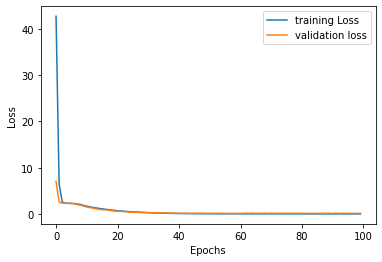

In [28]:
plt.plot(history.history['loss'], label = "training Loss")
plt.plot(history.history['val_loss'], label = "validation loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

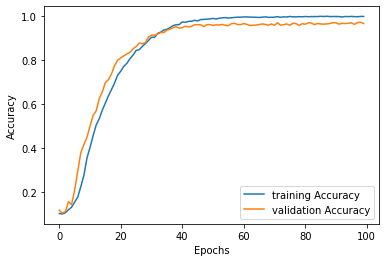

In [31]:
plt.plot(history.history['accuracy'], label = "training Accuracy")
plt.plot(history.history['val_accuracy'], label = "validation Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()